In [1]:
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm
from PIL import Image

In [2]:
def read_images(path):
    files = os.listdir(path)
    files = [file for file in files if file[-4:] == ".jpg"]   
    files = files[:2500]    
    images = []
    for file in tqdm(files):
        try:
            image = Image.open(os.path.join(path, file))
            image = image.resize((224, 224), Image.LANCZOS)
            image = image.convert("RGB")
            image = np.asarray(image)
            images.append(image)
        except OSError:
            pass
    
    return images
    
cats = read_images(os.path.join("PetImages", "Cat"))
dogs = read_images(os.path.join("PetImages", "Dog"))

dogs = np.asarray(dogs)
cats = np.asarray(cats)

# X = np.concatenate([dogs, cats]).astype(np.float32) / 255.
X = np.concatenate([dogs, cats])

y_dogs = np.zeros(len(dogs))
y_cats = np.ones(len(cats))

y = np.concatenate([y_dogs, y_cats])


### Transfer Learning with VGG16

In [3]:
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg16_model.trainable = False

X = preprocess_input(X)
X_after_vgg = vgg16_model.predict(X, verbose=0)

In [5]:
X_after_vgg.shape

(4999, 7, 7, 512)

In [6]:
X_after_vgg, y = shuffle(X_after_vgg, y)

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(7, 7, 512)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(lr=0.0001), loss="binary_crossentropy", metrics=["acc"])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                16400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 25,707,553
Trainable params: 25,707,553
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_after_vgg, y, epochs=50, batch_size=64, validation_split=0.2, shuffle=True, verbose=1)

Train on 3999 samples, validate on 1000 samples
Epoch 1/50
3999/3999 [==============================] - ETA: 2s - loss: 1.7681e-05 - acc: 1.000 - ETA: 2s - loss: 3.0054e-05 - acc: 1.000 - ETA: 2s - loss: 3.8108e-05 - acc: 1.000 - ETA: 2s - loss: 3.9359e-05 - acc: 1.000 - ETA: 2s - loss: 3.5883e-05 - acc: 1.000 - ETA: 2s - loss: 4.1160e-05 - acc: 1.000 - ETA: 2s - loss: 8.7492e-04 - acc: 1.000 - ETA: 1s - loss: 7.6222e-04 - acc: 1.000 - ETA: 1s - loss: 6.7880e-04 - acc: 1.000 - ETA: 1s - loss: 6.1059e-04 - acc: 1.000 - ETA: 1s - loss: 5.5518e-04 - acc: 1.000 - ETA: 1s - loss: 5.1830e-04 - acc: 1.000 - ETA: 1s - loss: 4.8458e-04 - acc: 1.000 - ETA: 1s - loss: 4.5588e-04 - acc: 1.000 - ETA: 1s - loss: 4.2573e-04 - acc: 1.000 - ETA: 1s - loss: 4.0150e-04 - acc: 1.000 - ETA: 1s - loss: 3.7749e-04 - acc: 1.000 - ETA: 1s - loss: 3.5771e-04 - acc: 1.000 - ETA: 1s - loss: 3.3975e-04 - acc: 1.000 - ETA: 0s - loss: 3.2488e-04 - acc: 1.000 - ETA: 0s - loss: 3.0993e-04 - acc: 1.000 - ETA: 0s - loss

3999/3999 [==============================] - ETA: 2s - loss: 1.7813e-05 - acc: 1.000 - ETA: 2s - loss: 3.4845e-05 - acc: 1.000 - ETA: 2s - loss: 3.0370e-05 - acc: 1.000 - ETA: 2s - loss: 4.8528e-05 - acc: 1.000 - ETA: 2s - loss: 4.9573e-05 - acc: 1.000 - ETA: 1s - loss: 4.3775e-05 - acc: 1.000 - ETA: 1s - loss: 3.9576e-05 - acc: 1.000 - ETA: 1s - loss: 7.5767e-04 - acc: 1.000 - ETA: 1s - loss: 6.7331e-04 - acc: 1.000 - ETA: 1s - loss: 6.0591e-04 - acc: 1.000 - ETA: 1s - loss: 5.5037e-04 - acc: 1.000 - ETA: 1s - loss: 5.0432e-04 - acc: 1.000 - ETA: 1s - loss: 4.6798e-04 - acc: 1.000 - ETA: 1s - loss: 4.3589e-04 - acc: 1.000 - ETA: 1s - loss: 4.0837e-04 - acc: 1.000 - ETA: 1s - loss: 3.8355e-04 - acc: 1.000 - ETA: 1s - loss: 3.6262e-04 - acc: 1.000 - ETA: 1s - loss: 3.4294e-04 - acc: 1.000 - ETA: 0s - loss: 3.2677e-04 - acc: 1.000 - ETA: 0s - loss: 3.1116e-04 - acc: 1.000 - ETA: 0s - loss: 2.9642e-04 - acc: 1.000 - ETA: 0s - loss: 2.8308e-04 - acc: 1.000 - ETA: 0s - loss: 2.7165e-04 - ac

3999/3999 [==============================] - ETA: 2s - loss: 9.9307e-06 - acc: 1.000 - ETA: 2s - loss: 7.7884e-06 - acc: 1.000 - ETA: 2s - loss: 9.2810e-06 - acc: 1.000 - ETA: 2s - loss: 1.0180e-05 - acc: 1.000 - ETA: 2s - loss: 1.0242e-05 - acc: 1.000 - ETA: 1s - loss: 1.1203e-05 - acc: 1.000 - ETA: 1s - loss: 1.6494e-05 - acc: 1.000 - ETA: 1s - loss: 1.7514e-05 - acc: 1.000 - ETA: 1s - loss: 1.7113e-05 - acc: 1.000 - ETA: 1s - loss: 1.6449e-05 - acc: 1.000 - ETA: 1s - loss: 1.7628e-05 - acc: 1.000 - ETA: 1s - loss: 4.8832e-04 - acc: 0.999 - ETA: 1s - loss: 4.5669e-04 - acc: 0.999 - ETA: 1s - loss: 4.2347e-04 - acc: 0.999 - ETA: 1s - loss: 3.9590e-04 - acc: 0.999 - ETA: 1s - loss: 3.7288e-04 - acc: 0.999 - ETA: 1s - loss: 3.5155e-04 - acc: 0.999 - ETA: 1s - loss: 3.3254e-04 - acc: 0.999 - ETA: 0s - loss: 3.1484e-04 - acc: 0.999 - ETA: 0s - loss: 2.9920e-04 - acc: 0.999 - ETA: 0s - loss: 2.8597e-04 - acc: 0.999 - ETA: 0s - loss: 2.7328e-04 - acc: 0.999 - ETA: 0s - loss: 2.6142e-04 - ac

3999/3999 [==============================] - ETA: 2s - loss: 0.0018 - acc: 1.000 - ETA: 2s - loss: 0.0030 - acc: 1.000 - ETA: 2s - loss: 0.0115 - acc: 0.996 - ETA: 2s - loss: 0.0088 - acc: 0.997 - ETA: 2s - loss: 0.0081 - acc: 0.998 - ETA: 1s - loss: 0.0069 - acc: 0.998 - ETA: 1s - loss: 0.0060 - acc: 0.998 - ETA: 1s - loss: 0.0053 - acc: 0.999 - ETA: 1s - loss: 0.0059 - acc: 0.998 - ETA: 1s - loss: 0.0053 - acc: 0.998 - ETA: 1s - loss: 0.0049 - acc: 0.998 - ETA: 1s - loss: 0.0130 - acc: 0.997 - ETA: 1s - loss: 0.0124 - acc: 0.996 - ETA: 1s - loss: 0.0166 - acc: 0.995 - ETA: 1s - loss: 0.0155 - acc: 0.996 - ETA: 1s - loss: 0.0146 - acc: 0.996 - ETA: 1s - loss: 0.0137 - acc: 0.996 - ETA: 1s - loss: 0.0134 - acc: 0.996 - ETA: 0s - loss: 0.0127 - acc: 0.996 - ETA: 0s - loss: 0.0123 - acc: 0.996 - ETA: 0s - loss: 0.0118 - acc: 0.997 - ETA: 0s - loss: 0.0114 - acc: 0.997 - ETA: 0s - loss: 0.0115 - acc: 0.996 - ETA: 0s - loss: 0.0116 - acc: 0.996 - ETA: 0s - loss: 0.0114 - acc: 0.996 - ETA: 

3999/3999 [==============================] - ETA: 2s - loss: 1.9587e-05 - acc: 1.000 - ETA: 2s - loss: 2.2229e-05 - acc: 1.000 - ETA: 2s - loss: 3.0328e-05 - acc: 1.000 - ETA: 2s - loss: 3.6483e-05 - acc: 1.000 - ETA: 2s - loss: 5.4368e-05 - acc: 1.000 - ETA: 1s - loss: 5.2781e-05 - acc: 1.000 - ETA: 1s - loss: 5.2801e-05 - acc: 1.000 - ETA: 1s - loss: 5.3123e-05 - acc: 1.000 - ETA: 1s - loss: 6.8944e-04 - acc: 1.000 - ETA: 1s - loss: 6.1710e-04 - acc: 1.000 - ETA: 1s - loss: 5.6148e-04 - acc: 1.000 - ETA: 1s - loss: 5.1445e-04 - acc: 1.000 - ETA: 1s - loss: 4.7560e-04 - acc: 1.000 - ETA: 1s - loss: 4.4317e-04 - acc: 1.000 - ETA: 1s - loss: 4.1298e-04 - acc: 1.000 - ETA: 1s - loss: 3.8834e-04 - acc: 1.000 - ETA: 1s - loss: 3.6573e-04 - acc: 1.000 - ETA: 1s - loss: 3.4638e-04 - acc: 1.000 - ETA: 0s - loss: 3.2860e-04 - acc: 1.000 - ETA: 0s - loss: 3.1605e-04 - acc: 1.000 - ETA: 0s - loss: 5.6954e-04 - acc: 0.999 - ETA: 0s - loss: 5.4360e-04 - acc: 0.999 - ETA: 0s - loss: 5.2142e-04 - ac

3999/3999 [==============================] - ETA: 2s - loss: 5.9013e-07 - acc: 1.000 - ETA: 2s - loss: 2.7367e-05 - acc: 1.000 - ETA: 2s - loss: 3.3478e-05 - acc: 1.000 - ETA: 2s - loss: 2.6800e-05 - acc: 1.000 - ETA: 2s - loss: 2.1299e-05 - acc: 1.000 - ETA: 1s - loss: 2.1800e-05 - acc: 1.000 - ETA: 1s - loss: 2.6403e-05 - acc: 1.000 - ETA: 1s - loss: 2.3275e-05 - acc: 1.000 - ETA: 1s - loss: 2.2670e-05 - acc: 1.000 - ETA: 1s - loss: 2.3463e-05 - acc: 1.000 - ETA: 1s - loss: 2.1768e-05 - acc: 1.000 - ETA: 1s - loss: 2.0006e-05 - acc: 1.000 - ETA: 1s - loss: 2.0507e-05 - acc: 1.000 - ETA: 1s - loss: 2.8090e-05 - acc: 1.000 - ETA: 1s - loss: 2.8062e-05 - acc: 1.000 - ETA: 1s - loss: 2.7202e-05 - acc: 1.000 - ETA: 1s - loss: 3.5685e-04 - acc: 0.999 - ETA: 1s - loss: 3.3864e-04 - acc: 0.999 - ETA: 0s - loss: 3.2114e-04 - acc: 0.999 - ETA: 0s - loss: 3.0624e-04 - acc: 0.999 - ETA: 0s - loss: 2.9184e-04 - acc: 0.999 - ETA: 0s - loss: 2.7865e-04 - acc: 0.999 - ETA: 0s - loss: 2.6701e-04 - ac

3999/3999 [==============================] - ETA: 1s - loss: 2.0388e-05 - acc: 1.000 - ETA: 2s - loss: 1.1762e-05 - acc: 1.000 - ETA: 2s - loss: 1.5284e-05 - acc: 1.000 - ETA: 2s - loss: 1.3054e-05 - acc: 1.000 - ETA: 2s - loss: 1.2666e-05 - acc: 1.000 - ETA: 1s - loss: 1.6076e-05 - acc: 1.000 - ETA: 1s - loss: 2.6508e-05 - acc: 1.000 - ETA: 1s - loss: 2.6649e-05 - acc: 1.000 - ETA: 1s - loss: 2.7021e-05 - acc: 1.000 - ETA: 1s - loss: 2.4494e-05 - acc: 1.000 - ETA: 1s - loss: 5.3847e-04 - acc: 0.999 - ETA: 1s - loss: 4.9248e-04 - acc: 0.999 - ETA: 1s - loss: 4.5429e-04 - acc: 0.999 - ETA: 1s - loss: 4.2137e-04 - acc: 0.999 - ETA: 1s - loss: 3.9262e-04 - acc: 0.999 - ETA: 1s - loss: 3.6886e-04 - acc: 0.999 - ETA: 1s - loss: 3.4656e-04 - acc: 0.999 - ETA: 1s - loss: 3.2705e-04 - acc: 0.999 - ETA: 1s - loss: 3.1119e-04 - acc: 0.999 - ETA: 0s - loss: 2.9537e-04 - acc: 0.999 - ETA: 0s - loss: 2.8159e-04 - acc: 0.999 - ETA: 0s - loss: 2.6905e-04 - acc: 0.999 - ETA: 0s - loss: 4.9842e-04 - ac

3999/3999 [==============================] - ETA: 2s - loss: 4.6459e-06 - acc: 1.000 - ETA: 2s - loss: 9.4578e-06 - acc: 1.000 - ETA: 2s - loss: 7.8311e-06 - acc: 1.000 - ETA: 2s - loss: 9.4837e-06 - acc: 1.000 - ETA: 1s - loss: 9.6575e-06 - acc: 1.000 - ETA: 1s - loss: 9.1889e-06 - acc: 1.000 - ETA: 1s - loss: 7.9828e-06 - acc: 1.000 - ETA: 1s - loss: 1.5604e-05 - acc: 1.000 - ETA: 1s - loss: 1.5111e-05 - acc: 1.000 - ETA: 1s - loss: 1.5247e-05 - acc: 1.000 - ETA: 1s - loss: 1.4481e-05 - acc: 1.000 - ETA: 1s - loss: 4.8580e-04 - acc: 1.000 - ETA: 1s - loss: 4.4850e-04 - acc: 1.000 - ETA: 1s - loss: 4.1677e-04 - acc: 1.000 - ETA: 1s - loss: 3.8853e-04 - acc: 1.000 - ETA: 1s - loss: 3.6527e-04 - acc: 1.000 - ETA: 1s - loss: 3.4365e-04 - acc: 1.000 - ETA: 1s - loss: 3.2454e-04 - acc: 1.000 - ETA: 0s - loss: 3.0720e-04 - acc: 1.000 - ETA: 0s - loss: 2.9170e-04 - acc: 1.000 - ETA: 0s - loss: 2.7793e-04 - acc: 1.000 - ETA: 0s - loss: 2.6593e-04 - acc: 1.000 - ETA: 0s - loss: 2.5458e-04 - ac

3999/3999 [==============================] - ETA: 2s - loss: 2.7096e-06 - acc: 1.000 - ETA: 2s - loss: 3.2978e-06 - acc: 1.000 - ETA: 2s - loss: 5.2716e-06 - acc: 1.000 - ETA: 2s - loss: 7.4723e-06 - acc: 1.000 - ETA: 2s - loss: 1.0616e-05 - acc: 1.000 - ETA: 1s - loss: 9.9378e-04 - acc: 1.000 - ETA: 1s - loss: 8.4345e-04 - acc: 1.000 - ETA: 1s - loss: 7.3282e-04 - acc: 1.000 - ETA: 1s - loss: 6.4716e-04 - acc: 1.000 - ETA: 1s - loss: 5.7980e-04 - acc: 1.000 - ETA: 1s - loss: 5.2488e-04 - acc: 1.000 - ETA: 1s - loss: 4.8021e-04 - acc: 1.000 - ETA: 1s - loss: 8.7674e-04 - acc: 0.999 - ETA: 1s - loss: 8.1238e-04 - acc: 0.999 - ETA: 1s - loss: 7.5672e-04 - acc: 0.999 - ETA: 1s - loss: 7.0885e-04 - acc: 0.999 - ETA: 1s - loss: 6.6632e-04 - acc: 0.999 - ETA: 1s - loss: 6.2850e-04 - acc: 0.999 - ETA: 0s - loss: 5.9507e-04 - acc: 0.999 - ETA: 0s - loss: 5.6466e-04 - acc: 0.999 - ETA: 0s - loss: 5.3767e-04 - acc: 0.999 - ETA: 0s - loss: 5.1274e-04 - acc: 0.999 - ETA: 0s - loss: 4.9005e-04 - ac

3999/3999 [==============================] - ETA: 1s - loss: 8.4864e-06 - acc: 1.000 - ETA: 2s - loss: 4.2206e-06 - acc: 1.000 - ETA: 2s - loss: 6.2027e-06 - acc: 1.000 - ETA: 2s - loss: 5.9075e-06 - acc: 1.000 - ETA: 2s - loss: 5.1348e-06 - acc: 1.000 - ETA: 1s - loss: 5.5180e-06 - acc: 1.000 - ETA: 1s - loss: 5.1844e-06 - acc: 1.000 - ETA: 1s - loss: 5.8719e-06 - acc: 1.000 - ETA: 1s - loss: 5.5226e-06 - acc: 1.000 - ETA: 1s - loss: 5.7550e-06 - acc: 1.000 - ETA: 1s - loss: 5.4737e-06 - acc: 1.000 - ETA: 1s - loss: 5.2304e-06 - acc: 1.000 - ETA: 1s - loss: 4.8290e-06 - acc: 1.000 - ETA: 1s - loss: 4.3827e-04 - acc: 1.000 - ETA: 1s - loss: 4.0696e-04 - acc: 1.000 - ETA: 1s - loss: 3.7918e-04 - acc: 1.000 - ETA: 1s - loss: 3.5509e-04 - acc: 1.000 - ETA: 1s - loss: 3.3400e-04 - acc: 1.000 - ETA: 1s - loss: 3.1502e-04 - acc: 1.000 - ETA: 1s - loss: 2.9838e-04 - acc: 1.000 - ETA: 0s - loss: 2.8347e-04 - acc: 1.000 - ETA: 0s - loss: 2.7003e-04 - acc: 1.000 - ETA: 0s - loss: 2.5824e-04 - ac

In [14]:
model.save("transfer-learning-vgg16-binary_class.h5")

### Predict


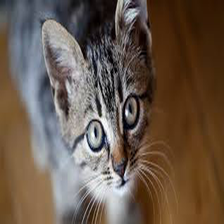

In [15]:
from PIL import Image

image = Image.open("cat.jpg")
image.resize((224, 224), Image.LANCZOS)

In [16]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

image = image.resize((224, 224), Image.LANCZOS)
image = np.asarray(image).reshape(1, 224, 224, 3)
image = preprocess_input(image)

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))
X_after_vgg = vgg16_model.predict(image)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
X_after_vgg.shape

(1, 7, 7, 512)

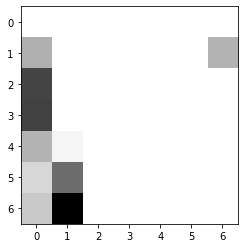

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_after_vgg[0,:,:,500],cmap="gray_r")
plt.show()

In [21]:
from tensorflow.keras.models import load_model

model = load_model("transfer-learning-vgg16-binary_class.h5")
model.predict(X_after_vgg)

array([[1.]], dtype=float32)